In [1]:
import numpy as np
import adafdr.method as md
import adafdr.data_loader as dl
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

# RNA-seq: airway data
## Load the airway data

In [2]:
p,x = dl.data_airway()
print('p:', p.shape)
print('x:', x.shape)

p: (33469,)
x: (33469, 1)


## covariate visualization

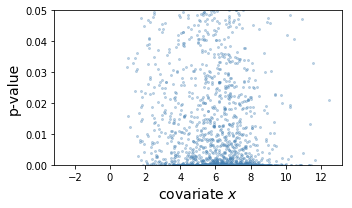

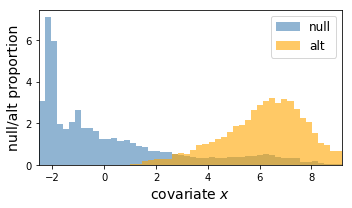

In [3]:
md.adafdr_explore(p, x, output_folder=None)

## hypothesis testing

# number of discoveries for BH: 4079
# number of discoveries for SBH: 4079
# number of discoveries for adafdr: 6050


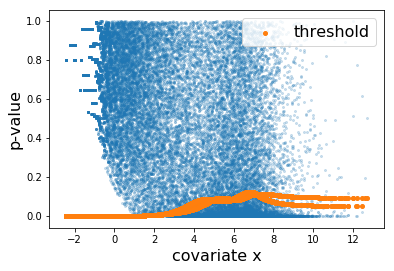

In [4]:
# Baseline methods: BH, SBH
alpha = 0.1
n_rej, t_rej = md.bh_test(p, alpha=alpha, verbose=False)
print('# number of discoveries for BH: %d'%n_rej)
n_rej, t_rej, pi0_hat = md.sbh_test(p, alpha=alpha, verbose=False)
print('# number of discoveries for SBH: %d'%n_rej)
res = md.adafdr_test(p, x, alpha=0.1, fast_mode=False, single_core=False)
n_rej = res['n_rej']
t_rej = res['threshold']
print('# number of discoveries for adafdr: %d'%np.sum(p<=t_rej))
plt.figure()
plt.scatter(x, p, alpha=0.2, s=4)
plt.scatter(x, t_rej, s=16, label='threshold')
plt.xlabel('covariate x', fontsize=16)
plt.ylabel('p-value', fontsize=16)
plt.legend(fontsize=16)
plt.show()